In [1]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

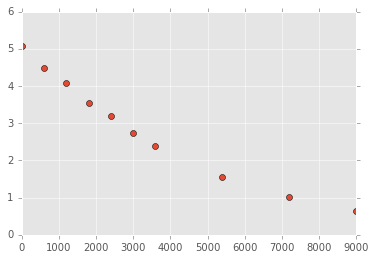

In [2]:
t = np.array([0, 600, 1200, 1800, 2400, 3000, 3600, 5400, 7200, 9000])
K = np.array([5.075, 4.48, 4.068, 3.542, 3.197, 2.747, 2.39, 1.552, 1.013, 0.641]) 
plt.plot(t, K, "o")


In [3]:
funciones = dict()
funciones['Orden 0'] = lambda K : K
funciones['Orden 0.5'] = lambda K : K**0.5
funciones['Orden 1'] = lambda K : np.log(K)
funciones['Orden 1.5'] = lambda K : 1/K**0.5
funciones['Orden 2'] = lambda K : 1/K
funciones['Orden 3'] = lambda K : 1/K**2

In [4]:
m = dict()
b = dict()
for key, func in funciones.items():
    slope, intercept, r_value, p_value, std_err = linregress(t,func(K))
    print(key)
    print("y = {}x + {}".format(slope, intercept))
    print("R^2 = {}".format(r_value**2))
    print("P = {}".format(p_value))
    print("Error tipico = {}".format(std_err))
    m[key] = slope
    b[key] = intercept


Orden 0
y = -0.0004918594786364337x + 4.552659416936603
R^2 = 0.9482789678779829
P = 1.9985517192909292e-06
Error tipico = 4.061267389191968e-05
Orden 2
y = 0.00014151544183537738x + 0.03953738286697678
R^2 = 0.9074260509358072
P = 2.0872017734978538e-05
Error tipico = 1.5980766717094276e-05
Orden 1.5
y = 8.734665821833178e-05x + 0.3811010226128176
R^2 = 0.9673705064334838
P = 3.1408549361875305e-07
Error tipico = 5.671658142808863e-06
Orden 3
y = 0.00022399204036043852x + -0.3202859502047387
R^2 = 0.7608517667262715
P = 0.0009954141925094515
Error tipico = 4.439879200010308e-05
Orden 0.5
y = -0.0001632825583003345x + 2.189687160181856
R^2 = 0.9900961302201629
P = 2.641225751989152e-09
Error tipico = 5.773758065589799e-06
Orden 1
y = -0.00023090412559283914x + 1.6740464152277164
R^2 = 0.9978110088741968
P = 6.283689247601573e-12
Error tipico = 3.823706540780736e-06


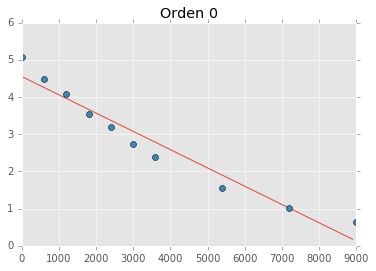

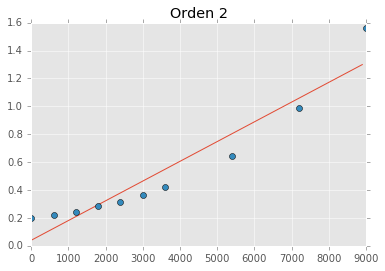

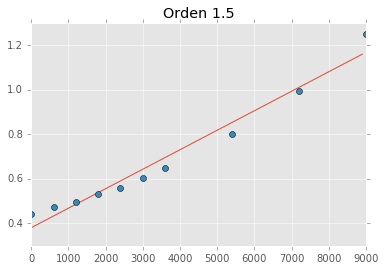

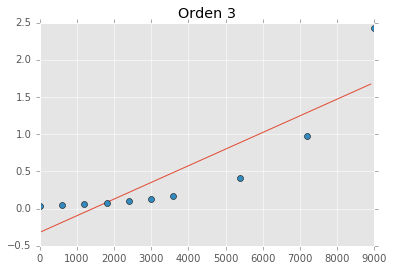

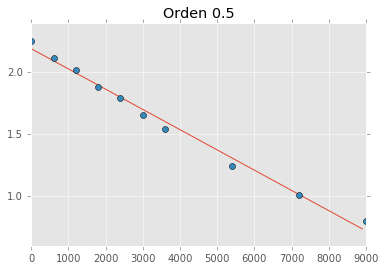

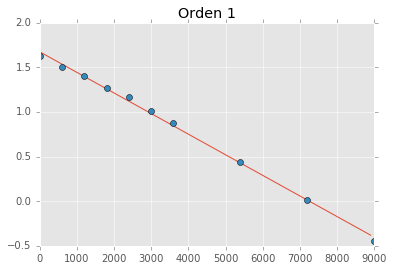

In [5]:
i = np.arange(0,9000,100)
for key, func in funciones.items():
    plt.figure()
    plt.plot(i, m[key]*i+b[key])
    plt.plot(t, func(K), "o")
    plt.title(key)

In [6]:
finv = dict()
finv['Orden 0'] = lambda t,m,b : (t*m + b)
finv['Orden 0.5'] = lambda t,m,b : (t*m + b)**2
finv['Orden 1'] = lambda t,m,b : np.exp((t*m + b))
finv['Orden 1.5'] = lambda t,m,b : 1/(t*m + b)**2
finv['Orden 2'] = lambda t,m,b : 1/(t*m + b)
finv['Orden 3'] = lambda t,m,b : 1/(t*m + b)**0.5

/home/dochoa/miniconda3/envs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt


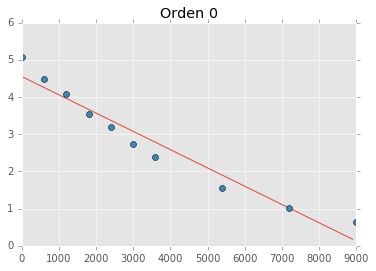

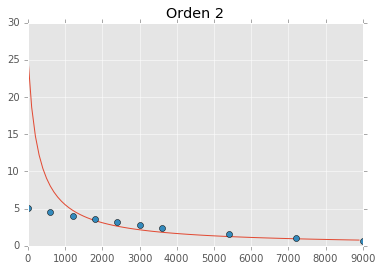

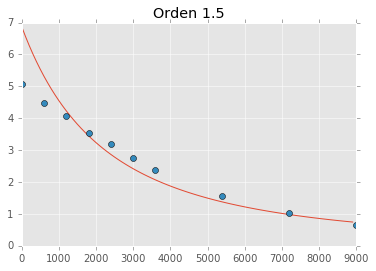

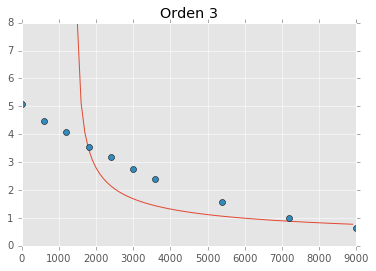

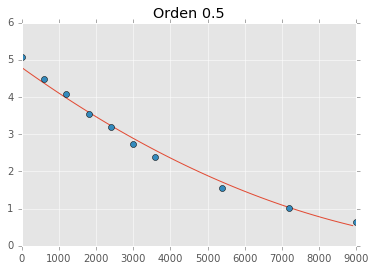

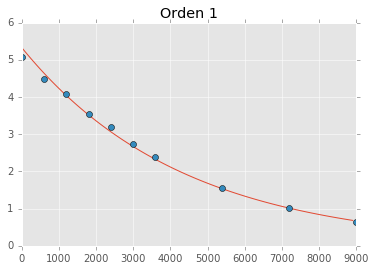

In [7]:
i = np.arange(0,9000,100)
for key, func in finv.items():
    plt.figure()
    plt.plot(i,func(i,m[key],b[key]))
    plt.plot(t, K, "o")
    plt.title(key)

C0 (Orden 1) = 5.333706581892363
k (Orden 1) = -0.00023090412559283914


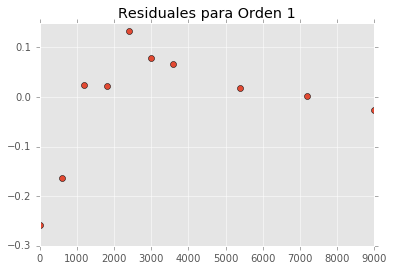

In [8]:
orden = 'Orden 1'
print("C0 ({}) = {}".format(orden, finv[orden](0,m[orden],b[orden])))
print("k ({}) = {}".format(orden, m[orden]))
plt.plot(t, K-finv[orden](t,m[orden],b[orden]), "o")
plt.title("Residuales para {}".format(orden))

In [9]:
from scipy.optimize import fmin

def minimizar(x):
    C0 = x[0]
    k = x[1]
    return ((K - C0 * np.exp(-k * t))**2).sum()
        
x0 = np.array([10, .01])
xfin = fmin(minimizar, x0)
print("C0 = {}".format(xfin[0]))
print("k = {}".format(xfin[1]))


Optimization terminated successfully.
         Current function value: 0.055725
         Iterations: 57
         Function evaluations: 112
C0 = 5.16381865181263
k = 0.00021560722365152567


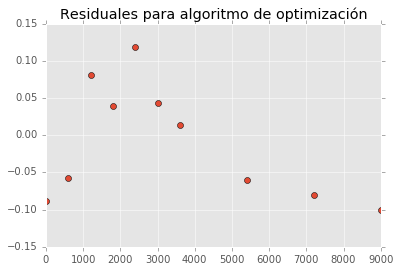

In [10]:
plt.plot(t, K - xfin[0] * np.exp(-xfin[1] * t), "o")
plt.title("Residuales para algoritmo de optimización")